This script is used for plotting heatmap of FR family kinship

"an estimated kinship coefficient range >0.354, [0.177, 0.354], [0.0884, 0.177] and [0.0442, 0.0884] corresponds to duplicate/MZ twin, 1st-degree, 2nd-degree, and 3rd-degree relationships respectively. "

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [2]:
def GetHMdata(file, labelFile):
    '''
    # output of KING software
    FID1    ID1     FID2    ID2     N_SNP   HetHet  IBS0    Kinship
    P363    P363    P474    P474    6047111 0.2361  0.0057  0.2204
    P363    P363    P475    P475    6046933 0.2244  0.0056  0.2238
    P363    P363    P478    P478    6050679 0.2324  0.0055  0.2274
    '''
    # pandas read txt
    data = pd.read_table(file, delimiter = '\t')
    labels = pd.read_csv(labelFile, header=None)
    xylabels = list(labels[0])
    # get xy labels
    #xylabels = list(set(list(data["FID1"]) + list(data["FID2"])))
    #xylabels.sort()
    #xylabels = ['P363', 'P481', 'P474', 'P475', 'P478', 'P479', 'P484', 'P485', 'P487', 'P490', 'P491', 'P492']
    # initial kinCoeff Matrix
    kinCoeff = np.zeros([len(xylabels),len(xylabels)]) + 0.500
    for i in range(len(data['FID1'])):
        # Matirx X rows
        x = xylabels.index(data['FID1'][i])
        # Matrix Y column
        y = xylabels.index(data['FID2'][i])
        # change KinCoeff in corresponding position, Matrix[x,y] = newvalue
        kinCoeff[x,y] = data['Kinship'][i]
        kinCoeff[y,x] = data['Kinship'][i]
    return xylabels, kinCoeff


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
        
    Note: modified from online python script resource.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw, shrink=0.5)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom").set_fontsize(20)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False, labelsize=20)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # unhashed it if necessary
    # ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False, labelsize=20)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "black"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
        
    Note: modified from online python script resource.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

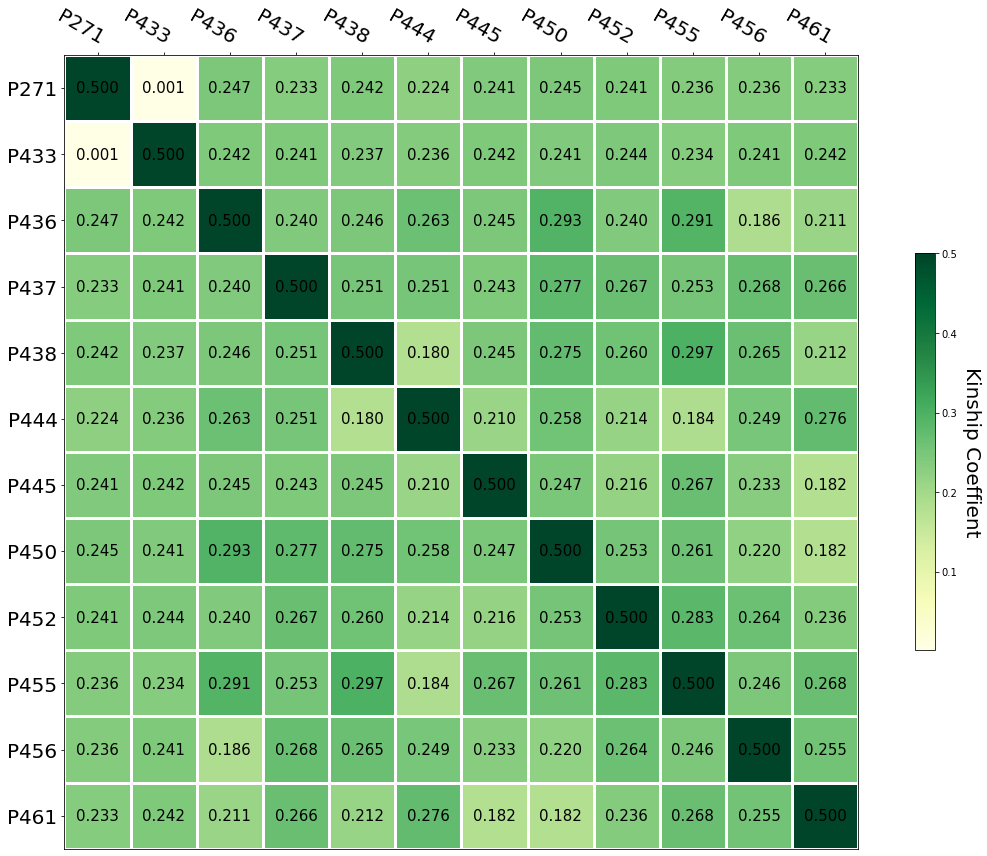

In [10]:
kinshipFile = 'Fam1.kin0'
labelFile = 'Fam1.samples.txt'
xylabels, kinCoeff = GetHMdata(kinshipFile,labelFile)
filename = kinshipFile.split('.')[0]
# set up subplot in figure
fig, ax = plt.subplots(figsize=(16,12))
# image and colorbar
im, cbar = heatmap(kinCoeff, xylabels, xylabels, ax=ax, cmap="YlGn", cbarlabel="Kinship Coeffient")
texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize=15)
fig.tight_layout()
# save figures
plt.savefig(filename + 'HeatMap.pdf', format = 'pdf', dpi=150, pad_inches=0)
# also show here
plt.show()

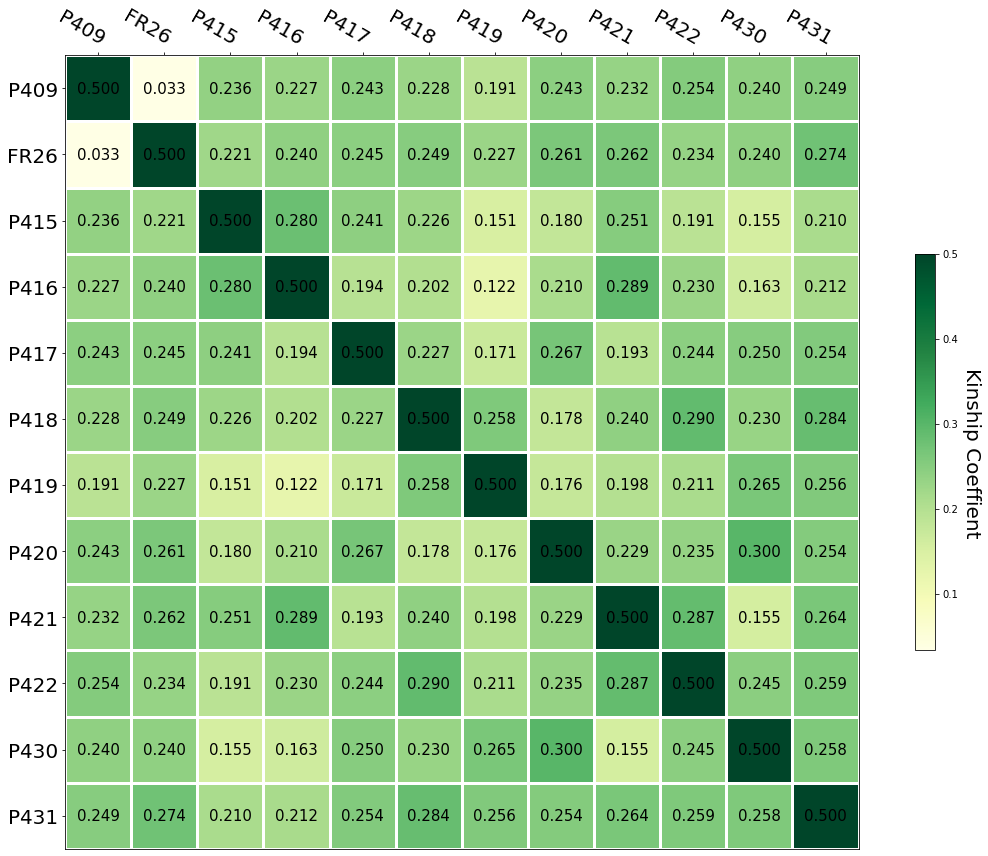

In [15]:
kinshipFile = 'Fam2.kin0'
labelFile = 'Fam2.samples.txt'
xylabels, kinCoeff = GetHMdata(kinshipFile,labelFile)
filename = kinshipFile.split('.')[0]
# set up subplot in figure
fig, ax = plt.subplots(figsize=(16,12))
# image and colorbar
im, cbar = heatmap(kinCoeff, xylabels, xylabels, ax=ax, cmap="YlGn", cbarlabel="Kinship Coeffient")
texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize=15)
fig.tight_layout()
# save figures
plt.savefig(filename + 'HeatMap.pdf', format = 'pdf', dpi=150, pad_inches=0)
# also show here
plt.show()

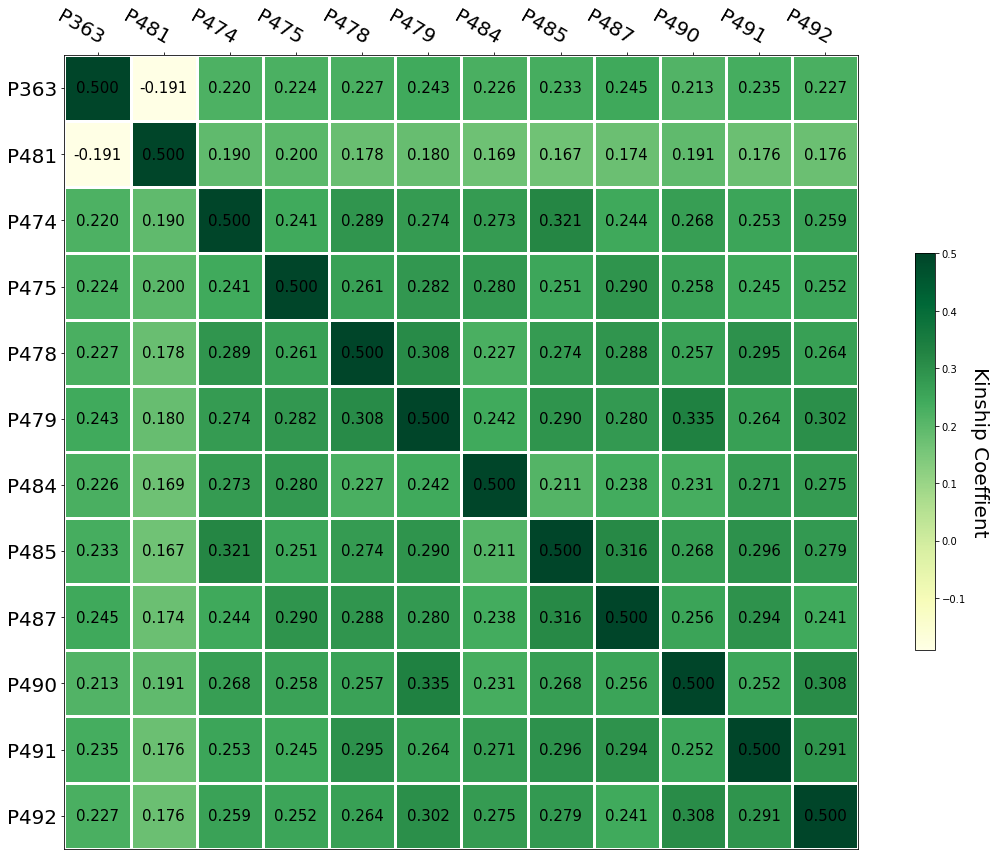

In [16]:
kinshipFile = 'Fam3.kin0'
labelFile = 'Fam3.samples.txt'
xylabels, kinCoeff = GetHMdata(kinshipFile,labelFile)
filename = kinshipFile.split('.')[0]
# set up subplot in figure
fig, ax = plt.subplots(figsize=(16,12))
# image and colorbar
im, cbar = heatmap(kinCoeff, xylabels, xylabels, ax=ax, cmap="YlGn", cbarlabel="Kinship Coeffient")
texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize=15)
fig.tight_layout()
# save figures
plt.savefig(filename + 'HeatMap.pdf', format = 'pdf', dpi=150, pad_inches=0)
# also show here
plt.show()

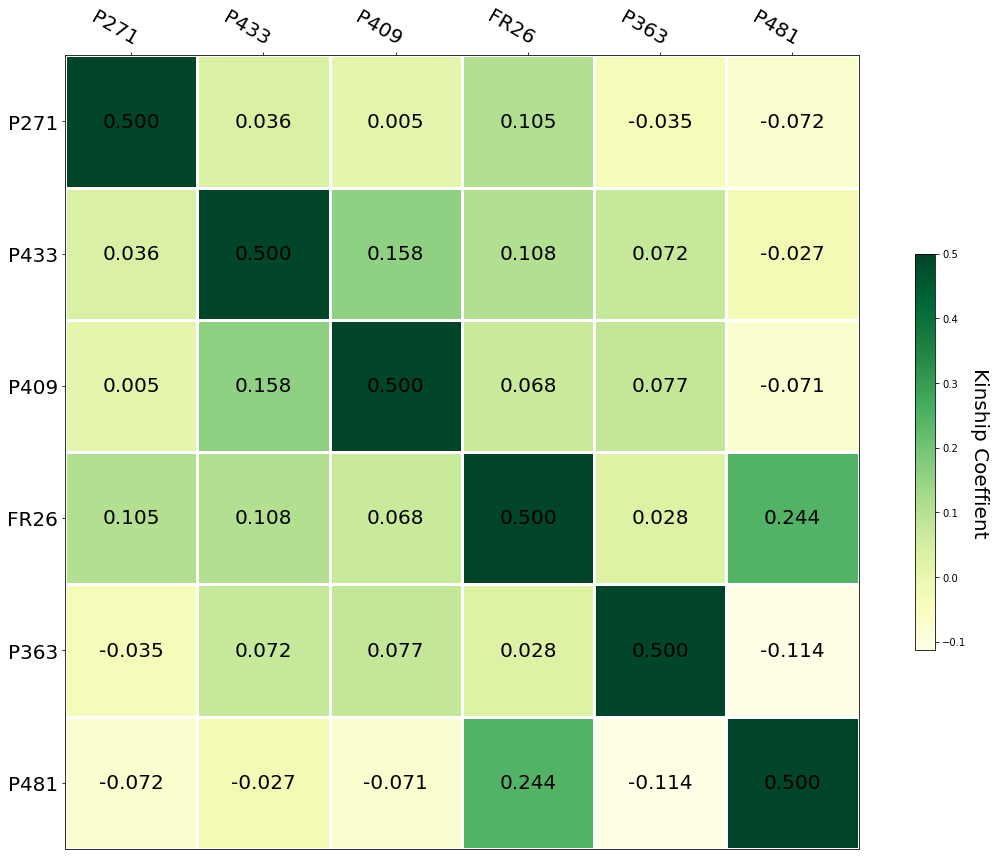

In [18]:
kinshipFile = 'parents.kin0'
labelFile = 'parents.txt'
xylabels, kinCoeff = GetHMdata(kinshipFile,labelFile)
filename = kinshipFile.split('.')[0]
# set up subplot in figure
fig, ax = plt.subplots(figsize=(16,12))
# image and colorbar
im, cbar = heatmap(kinCoeff, xylabels, xylabels, ax=ax, cmap="YlGn", cbarlabel="Kinship Coeffient")
texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize=20)
fig.tight_layout()
# save figures
plt.savefig(filename + 'HeatMap.pdf', format = 'pdf', dpi=200, pad_inches=0)
# also show here
plt.show()